#### 다항 회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형 회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘려주는 작업 진행 ==> 전처리에서 진행

In [2]:
### 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [17]:
# 임의의 데이터 생성 ==> 2D
X = np.arange(10).reshape(-1, 2)
y = np.arange(5)
X.shape, y.shape

((5, 2), (5,))

In [9]:
## 피쳐 2개 ==> 조합해서 늘리기
poly = PolynomialFeatures(include_bias = False)

poly.fit(X)
poly.transform(X)

# poly.transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [15]:
poly = PolynomialFeatures(include_bias = False, degree = 5)

X1 = poly.fit_transform(X)
X1.shape

(5, 20)

In [16]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

#### 모델에 적용

In [18]:
from sklearn.linear_model import LinearRegression

In [27]:
poly = PolynomialFeatures(include_bias = False, degree = 2)


model = LinearRegression()
model.fit(X1, y)

LinearRegression()

In [28]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('poly', poly), ('lrmodel', model)])

pipe.fit(X1, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lrmodel', LinearRegression())])

In [30]:
pipe.named_steps['lrmodel'].coef_

array([ 1.12937743e-07,  1.12937758e-07,  2.12499047e-07,  3.25436805e-07,
        4.38374562e-07,  3.75938648e-07,  5.88437695e-07,  9.13874500e-07,
        1.35224906e-06,  5.80625859e-07,  9.56564507e-07,  1.54500220e-06,
        2.45887670e-06,  3.81112577e-06,  6.12626255e-07,  1.19325211e-06,
        2.14981662e-06,  3.69481882e-06,  6.15369553e-06,  9.96482129e-06,
        2.12499047e-07,  3.25436805e-07,  3.75938648e-07,  5.88437695e-07,
        9.13874500e-07,  5.80625859e-07,  9.56564507e-07,  1.54500220e-06,
        2.45887670e-06,  6.12626255e-07,  1.19325211e-06,  2.14981662e-06,
        3.69481882e-06,  6.15369553e-06, -2.59269891e-07,  3.53356365e-07,
        1.54660848e-06,  3.69642510e-06,  7.39124393e-06,  1.35449395e-05,
        4.38374562e-07,  5.88437695e-07,  9.13874500e-07,  1.35224906e-06,
        9.56564507e-07,  1.54500220e-06,  2.45887670e-06,  3.81112577e-06,
        1.19325211e-06,  2.14981662e-06,  3.69481882e-06,  6.15369553e-06,
        9.96482129e-06,  

In [31]:
pipe.named_steps['poly'].degree

2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [35]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [37]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [39]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y

array([ 0.94438407,  0.82642941,  0.9140684 ,  0.89149027,  0.78702333,
       -0.20369387, -0.43737076, -0.44916866, -0.53900519, -0.60379084,
       -0.85735054, -0.96917536, -0.82205221, -0.88988354, -1.05695539,
       -0.90872159, -1.08279782, -0.99001822, -0.90106245, -0.8522328 ,
       -0.74552989, -0.95479934, -0.77110713, -0.77796125, -0.66203813,
       -0.54606895, -0.37463313, -0.25218061, -0.2869146 , -0.01050564])


Degree 1 회귀 계수는 [-1.49] 입니다.
Degree 1 MSE는 0.40749914882743843 입니다.

Degree 4 회귀 계수는 [  2.7  -27.43  38.45 -14.59] 입니다.
Degree 4 MSE는 0.007821973331362638 입니다.

Degree 15 회귀 계수는 [-1.46900000e+02  3.70913000e+03 -4.16955800e+04  2.03140190e+05
  1.17284530e+05 -7.23879755e+06  4.55942066e+07 -1.61261195e+08
  3.76463908e+08 -6.09280059e+08  6.90794011e+08 -5.40197709e+08
  2.78143659e+08 -8.49828928e+07  1.16825755e+07] 입니다.
Degree 15 MSE는 340264901.87848765 입니다.


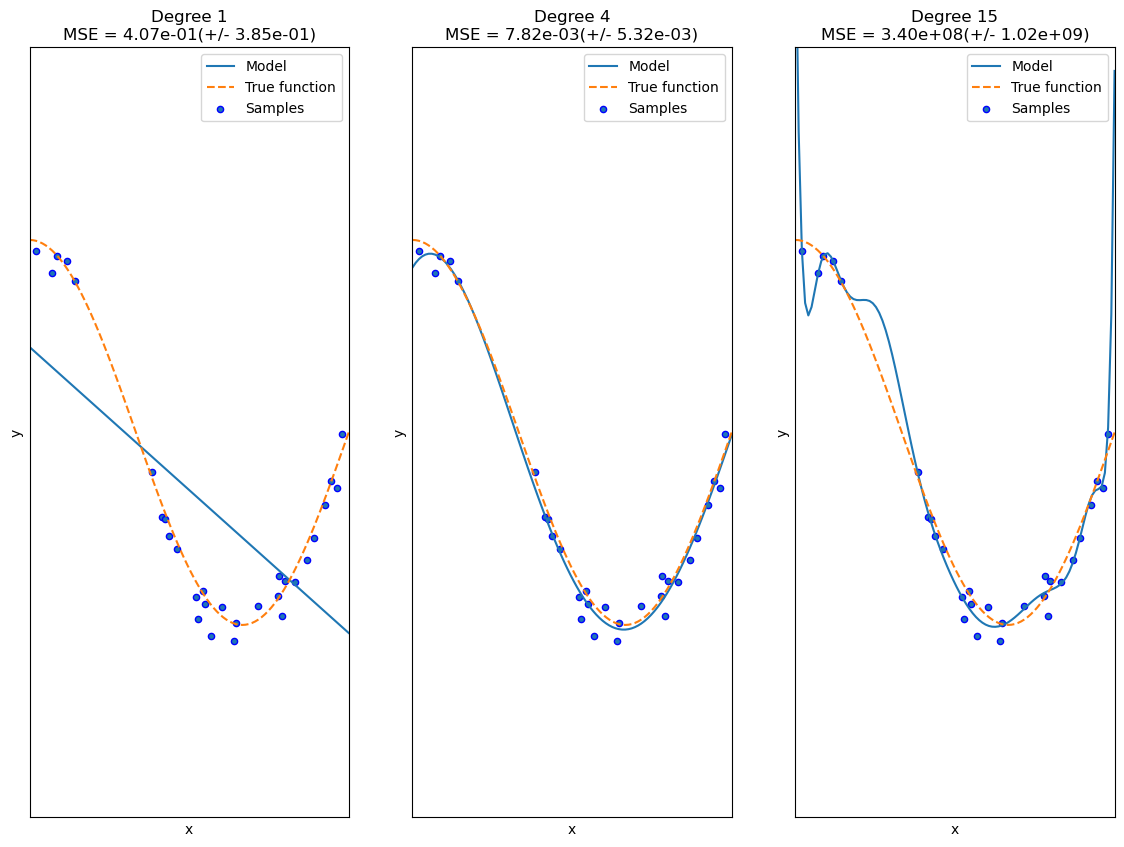

In [44]:
plt.figure(figsize = (14, 10))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())

    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    
    pipeline.fit(X.reshape(-1, 1), y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1 * np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model")
    plt.plot(X_test, true_fun(X_test), '--', label = "True function")
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = "Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc = "best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()